# 게임아이템

**문제요약**
- 팀에 속한 캐릭터에 아이템을 사용해 공격력을 높이는 문제

**조건**
- 아이템은 캐릭터의 공격력을 높이고 체력을 낮춤
- 아이템을 사용해 팀의 공격력을 최대한 끌어올린다
- 아이템 사용유무는 자유
- 아이템 사용한 캐릭터는 체력이 반드시 100이상 남아야함
- 한 캐릭터에 아이템 하나씩만 사용 가능
- 사용한 아이템은 사라짐

**예시**
- 캐릭터의 체력이 [200, 120, 150]인 경우 아이템의 효과는 다음과 같다.

|높여줄 공격치|낮추는 체력|
|:----:|:---:|
|30|100|
|500|30|
|100|400|

- 팀 공격력을 최대로 올리려면 첫번째 캐릭터에 첫번째 아이템(30,100)을, 세 번째 캐릭터에 두 번째 아이템(500, 30)을 사용할 수 있다.

**입력**
- healths: 캐릭터들의 체력을 담은 배열
- items: 아이템별 효과를 담은 이차원 배열

**제한조건**

- healths의 길이는 1 이상 10,000 이하입니다.

- healths의 원소(캐릭터의 체력)는 1 이상 1,000,000 이하인 자연수입니다.
    items의 길이는 1 이상 5,000 이하입니다.

- items에는 아이템이 [올려줄 공격력, 낮출 체력]이 번호 순서대로 들어있습니다.
- 아이템 번호는 1번 부터 시작합니다.
- items[i]에는 i + 1번 아이템이 [올려줄 공격력, 낮출 체력]이 들어있습니다.
- 아이템이 올리는 공격력은 1 이상 500,000 이하인 자연수입니다.
- 아이템이 내리는 체력은 1 이상 500,000 이하인 자연수입니다.
- 아이템 번호는 오름차순으로 정렬해 return 해주세요.
- 올려주는 공격력이 같은 아이템은 없습니다.
- 아이템을 사용하는 방법이 여러 가지라면, 그러한 방법 중 아무거나 하나를 return 해주세요. 단, 아이템 번호는 오름차순으로 정렬되어 있어야 합니다.

In [68]:
import copy
from collections import deque

def solution(healths, items):
    
    result = []
    healths.sort()
    items = [(item[0], item[1], idx + 1) for idx, item in enumerate(items)]
    items = deque(sorted(items, key=lambda x: (x[1], x[0])))

    for health in healths:
        for item_set in copy.deepcopy(items):
            decreased_hp = item_set[1]
            remained_hp = health - decreased_hp
            if remained_hp < 100:
                continue
            else:
                items.popleft()
                result.append(item_set[2])
                break

    return sorted(result)

In [69]:
# Test Case 1
healths = [200,120,150]
items = [[30,100],[500,30],[100,400]]
assert [1,2] == solution(healths, items)

[1, 2]

In [ ]:
# Test Case 2
healths = [300,200,500]
items = [[1000, 600], [400, 500], [300, 100]]
assert [3] == solution(healths, items)

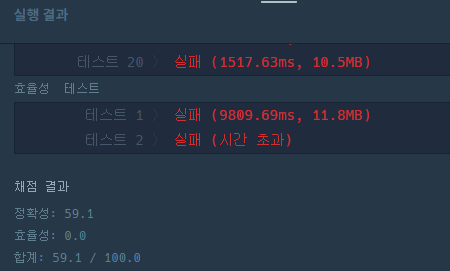